<h1>
Question4:Multi-Layer Perceptron
</h2>

<h2>
4.1: Pre-processing
</h2>


In [8]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping
from keras import backend as K
from sklearn.preprocessing import MinMaxScaler



In [9]:
# A
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Number of training samples:", len(x_train))
print("Number of testing samples:", len(x_test))
print("Shape of training data:", x_train.shape)
print("Shape of testing data:", x_test.shape)
print("Shape of labels:", y_train.shape)


Number of training samples: 60000
Number of testing samples: 10000
Shape of training data: (60000, 28, 28)
Shape of testing data: (10000, 28, 28)
Shape of labels: (60000,)


In [10]:
print(type(x_train))
print(type(y_train))
print(y_train[0])


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
5


(2, 5)


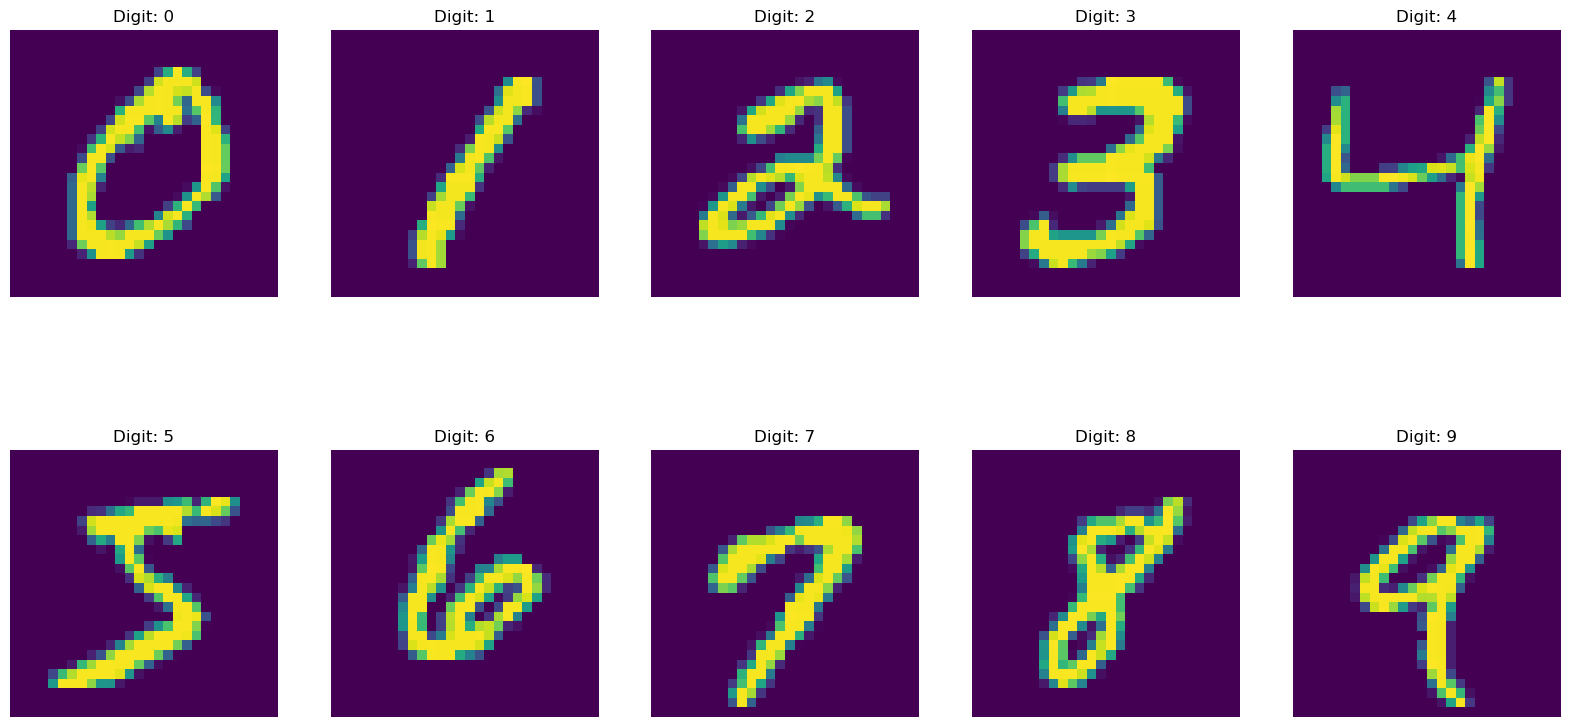

In [11]:
# B
# show an instance from each class:
unique_values = np.unique(y_train)
# Find indices of each unique value
indices = {value: np.where(y_train == value)[0][0] for value in unique_values}
# Plot the images
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
print(axes.shape)
for ax, index in zip(axes.ravel(), indices.values()):
    ax.imshow(x_train[index])
    ax.set_title('Digit: {}'.format(y_train[index]))
    ax.set_axis_off()

# 4-2

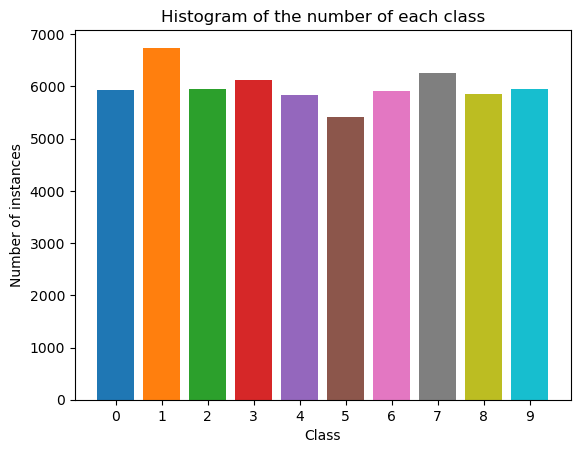

In [12]:
# C
#  histogram 
n, bins, patches = plt.hist(y_train, bins=np.arange(0, 11, 1), rwidth=0.8, color='blue')
plt.title('Histogram of the number of each class')
plt.xlabel('Class')
labels = np.unique(y_train)
# Set the x-ticks to be the center of each bin
shift = 0.5
plt.xticks(np.arange(shift, 10+shift , 1), labels)
# colorize:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for c, p in zip(colors, patches):
  p.set_facecolor(c)
plt.ylabel('Number of instances')
plt.show()



In [13]:
#
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# normalize using min-max normaliztion
nrmd_x_train = x_train.astype('float32') / 255.
nrmd_x_test = x_test.astype('float32') / 255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(np.max(nrmd_x_train), np.min(nrmd_x_train),
      np.max(nrmd_x_test), np.min(nrmd_x_test))
print(x_train.shape)
print(x_test.shape)


1.0 0.0 1.0 0.0
(60000, 28, 28)
(10000, 28, 28)


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def draw_confusion_matrix(predictions,y_test):
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title('Confusion Matrix')
    plt.ylabel('Y Hat Labels')
    plt.xlabel('Y Labels')



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 1024)              803840    
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1333770 (5.09 MB)
Trainable params: 1333770 (5.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
1875/1875 [==============================] - 28s 14ms/step - loss: 0.5348 - accuracy: 0.8674 - val_loss: 0.2764 - val_accuracy: 0.9223
Epoch 2/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2600 - accuracy: 0.9254 - val_loss: 0.2246 - val_accuracy: 0.9353
Epoch 3/20
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2098 - accuracy: 0.9403 - val_loss: 0.1836 - val_accuracy: 0.9466
Epoch 4/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1762 - accuracy: 0.9498 - val_loss: 0.1585 - val_accuracy: 0.9536
Epoch 5/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1519 - accuracy: 0.9567 - val_loss: 0.1435 - val_accuracy: 0.9573
Epoch 6/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1329 - accuracy: 0.9627 - val_loss: 0.1271 - val_accuracy: 0.9631
Epoch 7/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1177 - accuracy: 0.9673 - val_loss: 0.1151 -

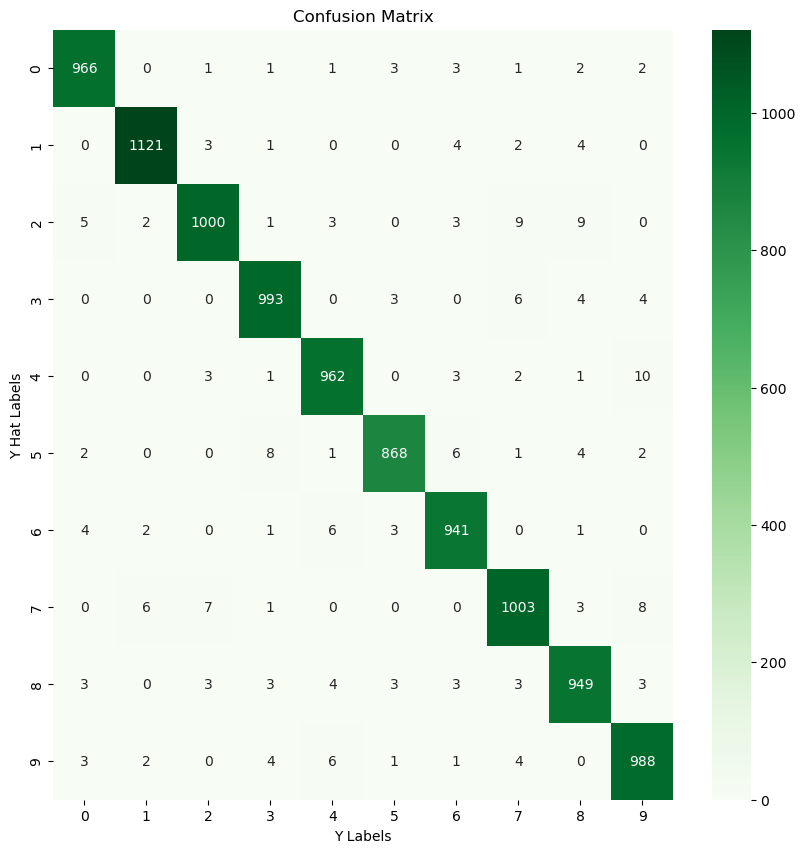

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD

# Define the model
teacher_model = Sequential([    
    Flatten(input_shape=(28, 28)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='linear')
])

teacher_model.compile(optimizer=SGD(learning_rate=0.01),  
              loss=CategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])
teacher_model.summary()
teacher_model.fit(nrmd_x_train, y_train, epochs=20, batch_size=32,
                 shuffle=True, validation_data=(nrmd_x_test,y_test ))

teacher_predictions = teacher_model.predict(nrmd_x_test)
draw_confusion_matrix(teacher_predictions,y_test)

# Accuracy and Loss 

In [21]:
teacher_loss, teacher_acc = teacher_model.evaluate(nrmd_x_test,y_test)
print(f"Loss : - Accuracy :", teacher_loss, teacher_acc)
# number of misclassifications:
teacher_predictions = teacher_model.predict(nrmd_x_test)
predicted_classes = np.argmax(teacher_predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
num_misclassifications = np.count_nonzero(predicted_classes != true_classes)
print("Number of misclassifications:", num_misclassifications)
print((1 - teacher_acc) * len(y_test))

313/313 [==============================] - 1s 5ms/step - loss: 0.0666 - accuracy: 0.9791
Loss : - Accuracy : 0.06661488860845566 0.9790999889373779
313/313 [==============================] - 1s 4ms/step
Number of misclassifications: 209
209.0001106262207


In [24]:
teacher_predictions = teacher_model.predict(nrmd_x_train)
print(teacher_predictions)

1875/1875 [==============================] - 9s 5ms/step
[[-2.7084095  -1.1375704   1.4136046  ... -0.86759967 -0.45020372
   1.1771561 ]
 [14.405681   -2.4369977   4.359641   ...  0.45760164 -2.9020674
   1.5203787 ]
 [-2.6080713  -1.8605716   1.4450006  ...  2.464871   -0.38110238
   0.67294186]
 ...
 [-4.5841036  -0.32389152 -7.06598    ... -5.7234287   1.7400787
   3.126067  ]
 [ 0.7477023  -0.41779345  1.7216     ... -1.6501445  -1.9069877
  -3.4918895 ]
 [ 2.509376   -3.0818303   1.0894593  ... -0.20500973  9.576873
   3.2170544 ]]


# 4-3

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6291 - accuracy: 0.8358 - val_loss: 0.3080 - val_accuracy: 0.9123
E

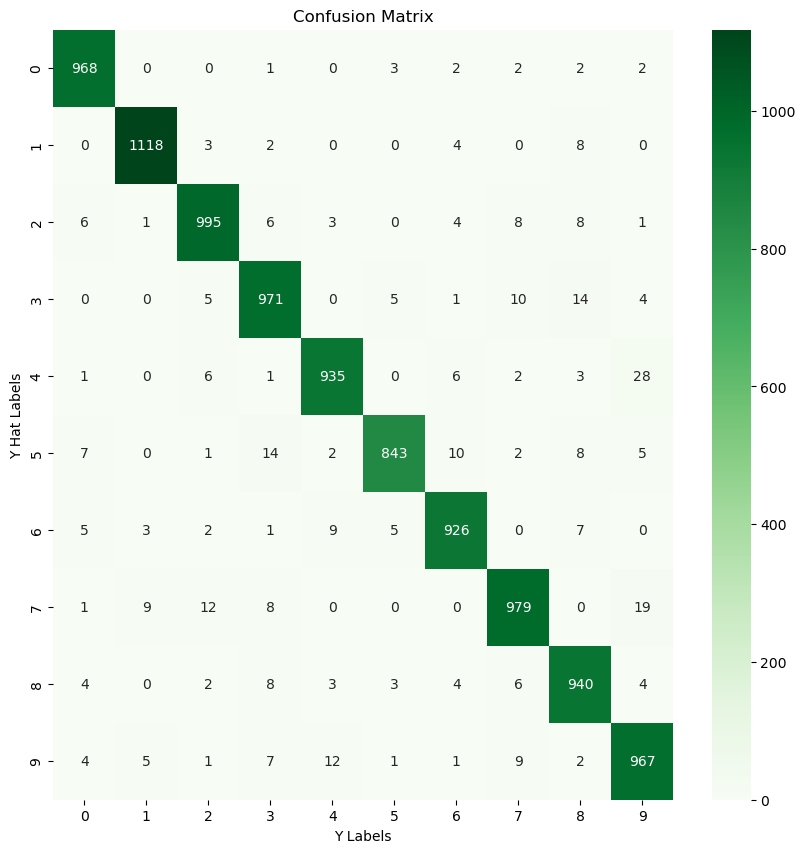

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy, MeanSquaredError
from tensorflow.keras.optimizers import SGD

# Define the model
student = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='linear')
])

student.compile(optimizer=SGD(learning_rate=0.01),
                loss=CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
student.summary()
history = student.fit(nrmd_x_train, y_train, epochs=10, batch_size=32,
            shuffle=True, validation_data=(nrmd_x_test, y_test))

student_predictions = student.predict(nrmd_x_test)
draw_confusion_matrix(student_predictions,y_test)

# number of misclassifications:
student_loss, student_acc = student.evaluate(nrmd_x_test,y_test)
predicted_classes = np.argmax(student_predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
num_misclassifications = np.count_nonzero(predicted_classes != true_classes)
print("Number of misclassifications:", num_misclassifications)
print((1 - student_acc) * len(y_test))

In [29]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# 4-4

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.6682 - accuracy: 0.9073 - val_loss: 27.1847 - val_accuracy: 0.9571
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5637 - accuracy: 0.9694 - val_loss: 28.0800 - val_accuracy: 0.9652
Epoch 3/

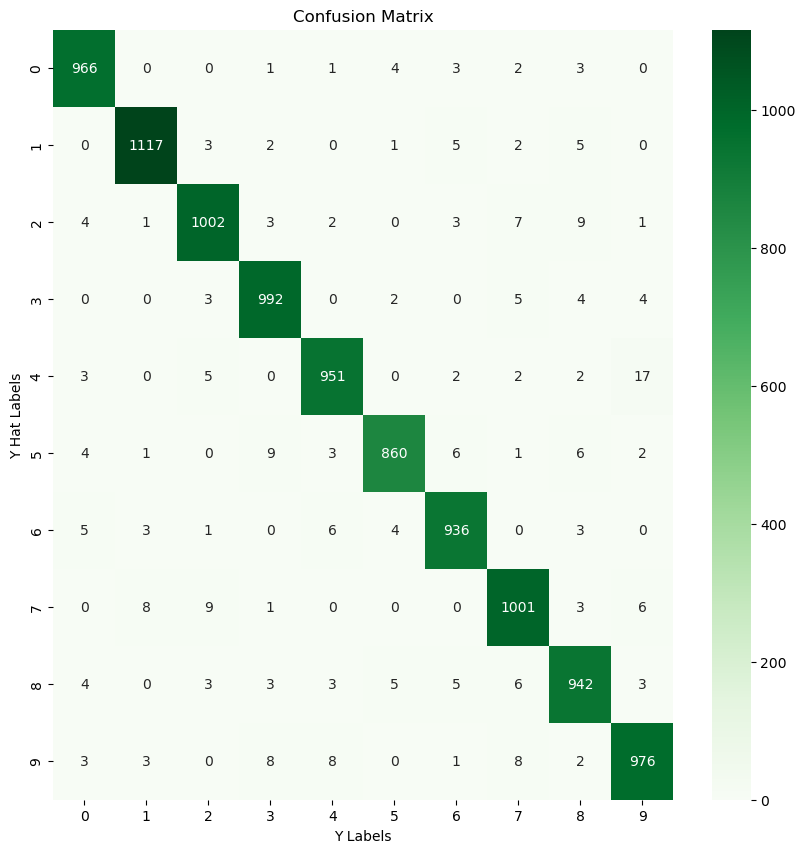

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy,MeanSquaredError
from tensorflow.keras.optimizers import SGD

# Define the model
distilled_student = Sequential([    
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='linear')
])

distilled_student.compile(optimizer=SGD(learning_rate=0.01),  
              loss='mse', 
              metrics=['accuracy'])
distilled_student.summary()
distilled_history = distilled_student.fit(nrmd_x_train, teacher_predictions, epochs=10, batch_size=32,
                 shuffle=True, validation_data=(nrmd_x_test,y_test ))
distilled_student_predictions = distilled_student.predict(nrmd_x_test)
draw_confusion_matrix(distilled_student_predictions,y_test)


# number of misclassifications:
student_loss, student_acc = distilled_student.evaluate(nrmd_x_test,y_test)
predicted_classes = np.argmax(distilled_student_predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
num_misclassifications = np.count_nonzero(predicted_classes != true_classes)
print("Number of misclassifications:", num_misclassifications)
print((1 - student_acc) * len(y_test))

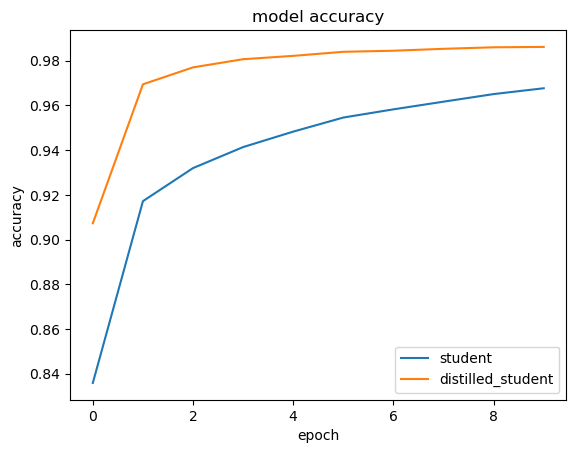

In [38]:
# plot the accuracy of sutdent and distillaition student:
# and plot val_accuracy:
plt.plot(history.history['accuracy'])
plt.plot(distilled_history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.plot(history.history['val_accuracy'])
# plt.plot(distilled_history.history['val_accuracy'])
# plt.legend(['student', 'distilled_student','student_val', 'distilled_student_val'],loc='lower right')
plt.legend(['student', 'distilled_student'],loc='lower right')
plt.show()